<a href="https://colab.research.google.com/github/mplata/lstm-mnist-sequence/blob/master/sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Model
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers import Input, Dense, LSTM, Conv2D, MaxPooling2D, TimeDistributed, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from matplotlib import pyplot as plt
import random
random.seed(101)

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
input_dim = x_train.shape[1] #28
encoding_dim = 32
total_elements = 500

In [0]:
#Shaping the training and test data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
def create_mnist_sequence(X,Y):
    total_its = int(total_elements/10)
    sequence = []
    print(total_its)
    for i in range(0,total_its):
        for num in range(0,10):
            delimited = X[Y == num]
            sampleInd = np.random.choice(delimited.shape[0])
            sample = delimited[sampleInd]
            sequence.append(sample)
    sequence = np.array(sequence)
    return sequence

In [0]:
sequence = create_mnist_sequence(x_train, y_train)

50


In [0]:
sequence.shape

(500, 28, 28, 1)

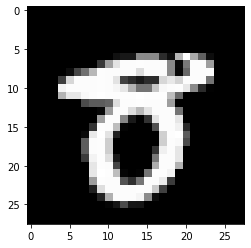

In [0]:
plt.figure()
plt.imshow(sequence[298,:].reshape(28,28), cmap='gray')

In [0]:
def create_matrix(sequence, m):
    matrix_x = []
    matrix_y = []
    for i in range(m,len(sequence)):
        matrix_x.append(sequence[i-m:i])
        matrix_y.append(sequence[i-1])
    matrix_x = np.array(matrix_x)
    matrix_y = np.array(matrix_y)
    print(matrix_x.shape)
    #matrix_x = np.reshape(matrix_x, (matrix_x.shape[0],matrix_x.shape[1],28))
    print(matrix_y.shape)
    return matrix_x,matrix_y

In [0]:
sequence.shape

(500, 28, 28, 1)

In [0]:
x_normal, y_normal = create_matrix(sequence,10)

(490, 10, 28, 28, 1)
(490, 28, 28, 1)


(490, 10, 28, 28)


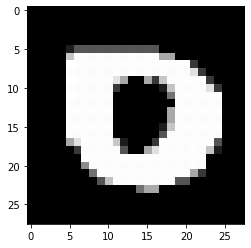

In [0]:
x_normal = x_normal.reshape(490,10,28,28)
y_normal = y_normal.reshape(490,28,28)
print(x_normal.shape)
plt.figure()
plt.imshow(x_normal[1,9,:].reshape(28,28), cmap='gray')
plt.imshow(y_normal[1].reshape(28,28), cmap='gray')

In [0]:
matrix_sequence_x, matrix_sequence_y = create_matrix(sequence,10)

(490, 10, 28, 28, 1)
(490, 28, 28, 1)


(490, 10, 28, 28, 1)


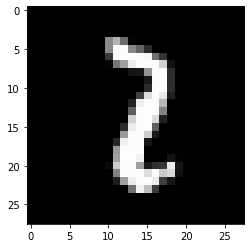

In [0]:
print(matrix_sequence_x.shape)
plt.figure()
plt.imshow(matrix_sequence_x[1,1,:].reshape(28,28), cmap='gray')

Se han truncado las últimas 5000 líneas del flujo de salida.
392/392 [==============================] - 0s 629us/step - loss: 0.0052 - val_loss: 0.0142
Epoch 502/3000
392/392 [==============================] - 0s 660us/step - loss: 0.0053 - val_loss: 0.0142
Epoch 503/3000
392/392 [==============================] - 0s 667us/step - loss: 0.0052 - val_loss: 0.0142
Epoch 504/3000
392/392 [==============================] - 0s 602us/step - loss: 0.0052 - val_loss: 0.0142
Epoch 505/3000
392/392 [==============================] - 0s 649us/step - loss: 0.0050 - val_loss: 0.0142
Epoch 506/3000
392/392 [==============================] - 0s 629us/step - loss: 0.0052 - val_loss: 0.0142
Epoch 507/3000
392/392 [==============================] - 0s 671us/step - loss: 0.0051 - val_loss: 0.0142
Epoch 508/3000
392/392 [==============================] - 0s 618us/step - loss: 0.0051 - val_loss: 0.0142
Epoch 509/3000
392/392 [==============================] - 0s 625us/step - loss: 0.0051 - val_loss: 0.0142


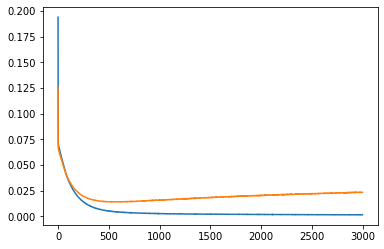

In [0]:
print(matrix_sequence_y.shape)
modelo_lstm = Sequential()
modelo_lstm.add(LSTM(units=100, dropout=0.2,return_sequences=False ,input_shape=(10,784),name='lstm_1'))
modelo_lstm.add(Dense(784, activation='sigmoid'))
modelo_lstm.compile(loss='mse', optimizer='adam')
h = modelo_lstm.fit(matrix_sequence_x.reshape(490,10,784),matrix_sequence_y.reshape(490,784),epochs=3000, validation_split=0.2,verbose=1)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()

In [0]:
#preds = modelo_lstm.predict(x_test.reshape(10000,28*28,1))
validation_sequence = create_mnist_sequence(x_test, y_test)

50


In [0]:
validation_matrix_sequence_x, validation_matrix_sequence_y = create_matrix(validation_sequence,10)

(490, 10, 28, 28, 1)
(490, 28, 28, 1)


In [0]:
predicted = modelo_lstm.predict(validation_matrix_sequence_x.reshape(490,10,784))

In [0]:
predicted.shape

(490, 784)

In [0]:
validation_matrix_sequence_y.shape

(490, 28, 28, 1)

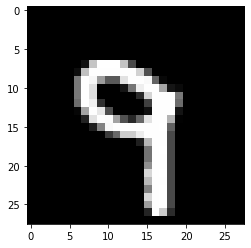

In [0]:
plt.figure()
plt.imshow(validation_matrix_sequence_y[10].reshape(28,28), cmap='gray')

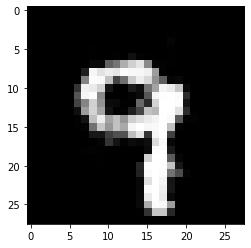

In [0]:
plt.figure()
plt.imshow(predicted[10].reshape(28,28), cmap='gray')